In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [165]:
sns.set(style="whitegrid")

df = pd.read_csv('C:\\Users\\Admin\\Data Scientist Projects\\End-to-End Project\\notebook\\data\\raw_data.csv')
df.head(10)

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S\r\n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C\r\n
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S\r\n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S\r\n
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S\r\n
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,NaN,Q\r\n
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S\r\n
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S\r\n
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S\r\n
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C\r\n


In [166]:
df.loc[df['age']==0,'age'] = np.nan
df['embarked']=df['embarked'].astype('str').str.strip()
embarked_mapping = {'C':'Cherbourg(C)','Q':'Queenstown(Q)','S':'Southampton(S)'} 
df['embarked_name'] = df['embarked'].map(embarked_mapping)

df.head(4)
#df.isna().sum()
#(df['age']==0).sum()

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,embarked_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton(S)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg(C)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton(S)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southampton(S)


In [167]:
df.duplicated().sum()

np.int64(2)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   passenger_id   895 non-null    int64  
 1   survived       895 non-null    int64  
 2   pclass         895 non-null    int64  
 3   name           895 non-null    object 
 4   sex            895 non-null    object 
 5   age            718 non-null    float64
 6   sibsp          895 non-null    int64  
 7   parch          895 non-null    int64  
 8   ticket         895 non-null    object 
 9   fare           895 non-null    float64
 10  cabin          207 non-null    object 
 11  embarked       895 non-null    object 
 12  embarked_name  893 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 91.0+ KB


In [169]:
df.nunique()

passenger_id     893
survived           2
pclass             3
name             893
sex                2
age               88
sibsp              7
parch              7
ticket           681
fare             248
cabin            147
embarked           4
embarked_name      3
dtype: int64

In [170]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare
count,895.000000,895.000000,895.000000,718.000000,895.000000,895.000000,895.000000
mean,447.996648,0.385475,2.305028,29.704972,0.520670,0.379888,32.169496
std,258.502755,0.486979,0.837947,14.487901,1.100827,0.804655,49.589030
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.500000,0.000000,2.000000,20.625000,0.000000,0.000000,7.910400
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,671.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,893.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [171]:
numer_feature = [feature for feature in df.columns if df[feature].dtype !='O']
categ_feature = [feature for feature in df.columns if df[feature].dtype =='O']

print("We have {} numerical features: {}" .format(len(numer_feature),numer_feature))
print("We have {} categorical features: {}" .format(len(categ_feature),categ_feature))

We have 7 numerical features: ['passenger_id', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
We have 6 categorical features: ['name', 'sex', 'ticket', 'cabin', 'embarked', 'embarked_name']


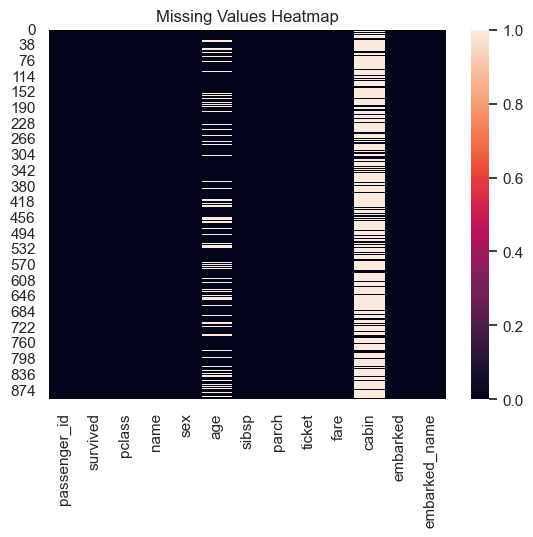

In [172]:
import seaborn as sns
sns.heatmap(df.isna())
plt.title("Missing Values Heatmap")
plt.show()

# Traget Variable Analysis

In [173]:
df['survived'].value_counts()

survived
0    550
1    345
Name: count, dtype: int64

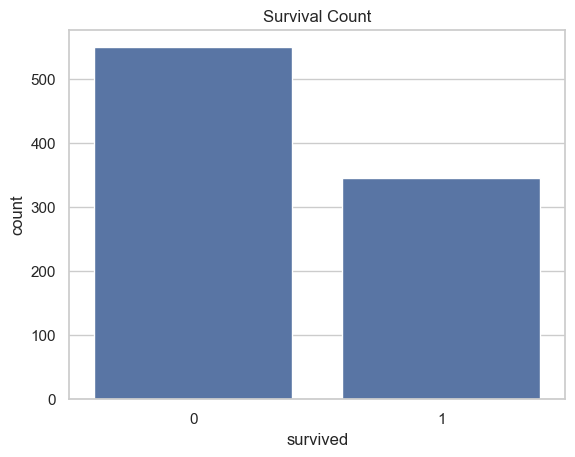

In [174]:
sns.countplot(x='survived',data=df)
plt.title("Survival Count")
plt.show()

Number of people who did not survived is less compare to people who survive

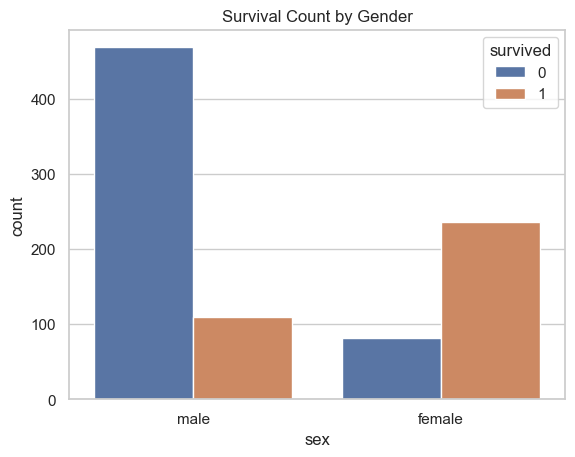

In [175]:
sns.countplot(x='sex',hue='survived',data=df)
plt.title("Survival Count by Gender")
plt.show()

Out of overall peoples, Females survived much more than males

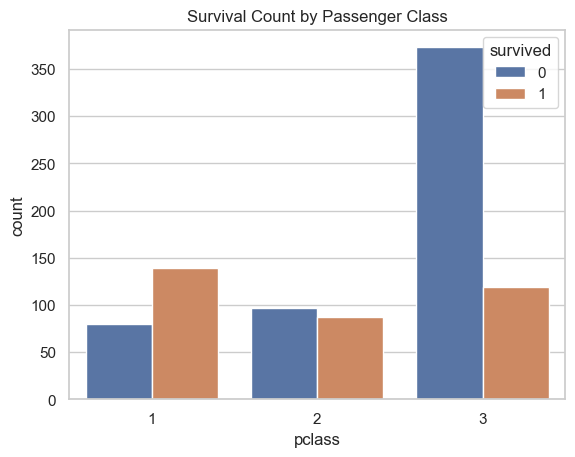

In [176]:
sns.countplot(x='pclass',hue='survived',data=df)
plt.title("Survival Count by Passenger Class")
plt.show()  

People who were in first class and second class survived more than people in class third

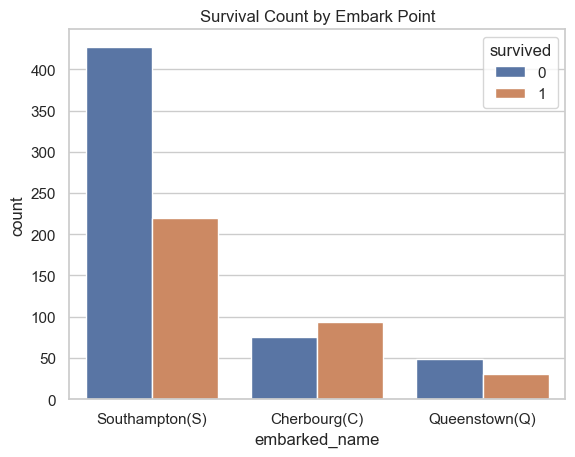

In [177]:

sns.countplot(x='embarked_name',hue='survived',data=df)
plt.title("Survival Count by Embark Point")
plt.show()

People who onboarded from Southampton are the highest who survived as well as not survived compare to Cherbourg and Queenstown

# Numerical feature Analysis

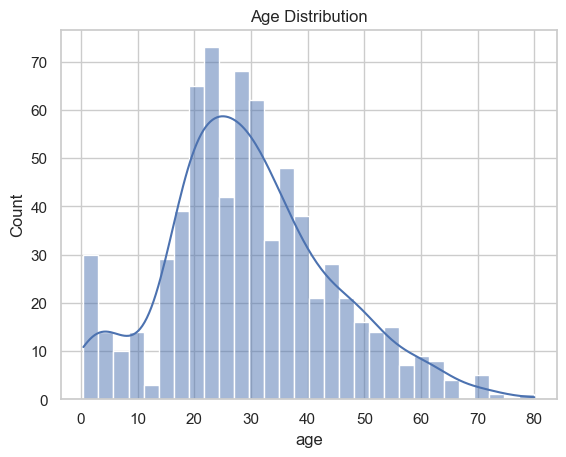

In [178]:
sns.histplot(df['age'],bins=30,kde=True)
plt.title("Age Distribution")
plt.show()


This shows that many passenger were young adults

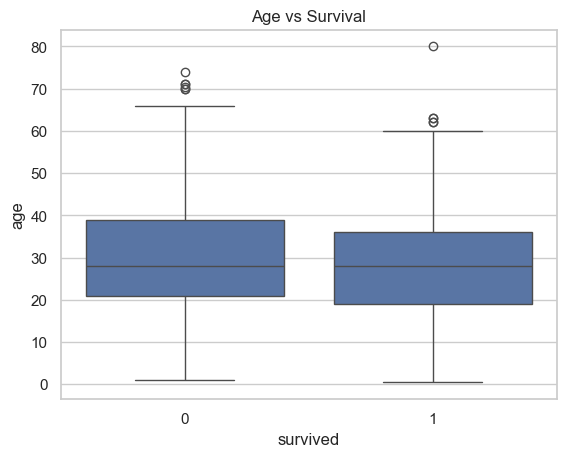

In [179]:
sns.boxplot(x='survived',y='age',data=df)
plt.title("Age vs Survival")
plt.show()

Survivors are slighly younger on average

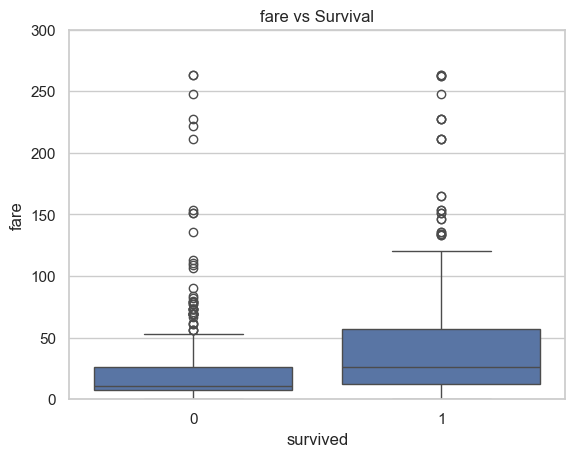

In [180]:
sns.boxplot(x='survived',y='fare',data=df)
plt.ylim(0,300)
plt.title("fare vs Survival")
plt.show()

The box plot shows that higher the fare higher the chance of survival

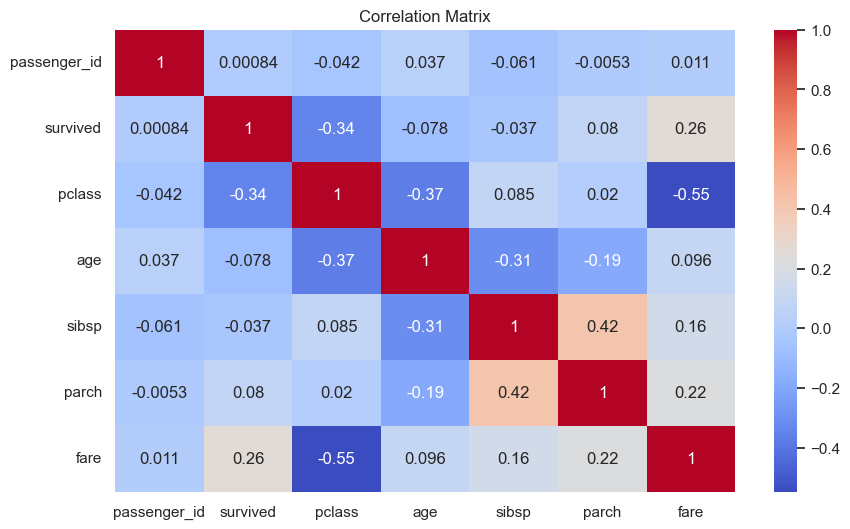

In [181]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [182]:
df.head(15)

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,embarked_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton(S)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg(C)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton(S)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southampton(S)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southampton(S)
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Queenstown(Q)
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Southampton(S)
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Southampton(S)
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Southampton(S)
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Cherbourg(C)


In [183]:

df.isna().sum()

passenger_id       0
survived           0
pclass             0
name               0
sex                0
age              177
sibsp              0
parch              0
ticket             0
fare               0
cabin            688
embarked           0
embarked_name      2
dtype: int64

In [184]:
df['age'].fillna(df['age'].median(),inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

df.isna().sum()

passenger_id       0
survived           0
pclass             0
name               0
sex                0
age                0
sibsp              0
parch              0
ticket             0
fare               0
cabin            688
embarked           0
embarked_name      2
dtype: int64

In [185]:
df.drop(columns=['passenger_id'],inplace=True)


In [186]:
df.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,embarked_name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton(S)
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg(C)
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton(S)
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southampton(S)
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southampton(S)
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Queenstown(Q)
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Southampton(S)
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Southampton(S)
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Southampton(S)
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Cherbourg(C)


# Feature Enggineering

In [187]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

In [188]:
df['isAlone'] = df['family_size'].apply(lambda x:1 if x==1 else 0)

In [189]:
df['sex'] = df['sex'].map({'male':0,'female':1})
#df['embarked'] = df['embarked'].map({'C':0,'Q':1,'S':2})
df=pd.get_dummies(df,columns=['embarked'],drop_first=True,dtype=int)


In [190]:
df.drop(columns=['embarked_name'],inplace=True)
df.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,family_size,isAlone,embarked_C,embarked_Q,embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2,0,0,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,1,0,0,1
5,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,1,1,0,1,0
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1,1,0,0,1
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,5,0,0,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,3,0,0,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,2,0,1,0,0


# Feature Selection

In [191]:
x=df[['pclass','sex','age','fare','family_size','isAlone','embarked_Q','embarked_S']]
y=df['survived']
x.head(5)

,pclass,sex,age,fare,family_size,isAlone,embarked_Q,embarked_S
0,3,0,22.0,7.2500,2,0,0,1
1,1,1,38.0,71.2833,2,0,0,0
2,3,1,26.0,7.9250,1,1,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,3,0,35.0,8.0500,1,1,0,1


# Logistic Expression

In [192]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x,y)

LogisticRegression(max_iter=1000)

In [195]:
importance = pd.Series(model.coef_[0],index=x.columns).sort_values(ascending=False)
importance

sex            2.574676
embarked_Q     0.010622
fare           0.001906
age           -0.037373
embarked_S    -0.339030
family_size   -0.370799
isAlone       -0.680463
pclass        -1.024920
dtype: float64

# Decision Tree

In [196]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(x,y)


DecisionTreeClassifier(random_state=42)

In [198]:
importance = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
importance

sex            0.314115
fare           0.251514
age            0.223833
pclass         0.119003
family_size    0.064713
embarked_S     0.014696
embarked_Q     0.008275
isAlone        0.003850
dtype: float64

# Statistical Tests

In [201]:
# Chi-Square
from sklearn.feature_selection import chi2

X_cat = x[['sex', 'isAlone', 'embarked_Q', 'embarked_S']]

chi_scores = chi2(X_cat,y)
chi_results = pd.DataFrame({'Feature':X_cat.columns,'Chi2_Score':chi_scores[0],'P_Value':chi_scores[1]}).sort_values('P_Value')
chi_results

,Feature,Chi2_Score,P_Value
0,sex,172.474009,2.132261e-39
1,isAlone,14.122149,1.713147e-04
3,embarked_S,5.640540,1.754980e-02
2,embarked_Q,0.000243,9.875567e-01


In [203]:
# ANOVA
from sklearn.feature_selection import f_classif

x_num = x[['age','fare','family_size']]

f_scores,p_values = f_classif(x_num,y)

anova_results = pd.DataFrame({'Feature':x_num.columns,'F_Score':f_scores,'P_Value':p_values}).sort_values('P_Value')
anova_results


,Feature,F_Score,P_Value
1,fare,63.015674,6.135150e-15
0,age,3.821117,5.092218e-02
2,family_size,0.192911,6.606110e-01


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [206]:
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64
survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64
survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


# Model Training

In [210]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [211]:
coefficients = pd.Series(model.coef_[0],index=X_train.columns).sort_values(ascending=False)
coefficients

sex            2.511723
embarked_Q     0.340719
fare           0.002286
age           -0.038819
embarked_S    -0.287782
family_size   -0.310930
isAlone       -0.680839
pclass        -1.031028
dtype: float64

In [214]:
y_pred = model.predict(X_test)
y_pred = model.predict_proba(X_test)[:,1]
y_pred

array([0.10966141, 0.07056448, 0.13866134, 0.33968301, 0.76528949,
       0.56148575, 0.71059074, 0.17353851, 0.37365389, 0.24301776,
       0.15220036, 0.14212973, 0.55106998, 0.26546731, 0.12218076,
       0.1678406 , 0.41178152, 0.08744317, 0.12782034, 0.7262924 ,
       0.08744317, 0.80582398, 0.08144313, 0.49539961, 0.08436385,
       0.94329861, 0.15220036, 0.35681688, 0.10942276, 0.11477877,
       0.08862686, 0.93428105, 0.12110032, 0.09711323, 0.17787931,
       0.72252096, 0.17943064, 0.31549011, 0.15220036, 0.83969646,
       0.15307079, 0.96490186, 0.11112578, 0.83618278, 0.72219196,
       0.11166794, 0.0938101 , 0.51844252, 0.78342262, 0.85298182,
       0.86592487, 0.54151962, 0.68868967, 0.21367425, 0.77147494,
       0.09384007, 0.12379741, 0.37443238, 0.60761037, 0.38371027,
       0.69821267, 0.68922049, 0.13238138, 0.05063263, 0.52052371,
       0.65393312, 0.95502537, 0.07336992, 0.18112506, 0.42491323,
       0.80211614, 0.11310946, 0.70124973, 0.94652937, 0.18262

# Model Evaluation

In [225]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("ROC AUC Score:",roc_auc_score(y_test,y_pred_proba))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy: 0.7988826815642458
Precision: 0.7619047619047619
Recall: 0.6956521739130435
ROC AUC Score: 0.8467720685111989
Confusion Matrix:
 [[95 15]
 [21 48]]
